## Imports



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [6]:
data = pd.read_csv(r"C:\Users\Sony\Desktop\JUPYTER NOTEBOOK\UDEMY\PERIAN DATA SCIENCE\RESOURCES USED IN COURSE\DATA\heart.csv")

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
data.shape

(303, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
from skimpy import skim

skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 303    │ │ int32       │ 13    │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ age                 │     0 │        0 │      54 │     9.1 │     29 │     48 │     61 │      77 │  ▁▄▅█▅▁  │  │
│ │ sex                 │     0 │        0 │    0.68 │    0.47 │      0 │      0 │      1 │       1 │  ▄    █  │  │
│ │ cp                  │     0 │        0 │    0.97 │       1 │      0 │      0 │      2 │       3 │  █ ▃ ▅▁  │  │
│ │ trestbps            │     0 │        0 │     130 │      18 │     94 │    120 │    140 │     200 │  ▃▇█▃▁   │  │
│ │ chol                │     0 │        0 │     250 │      52 │    130 │    210 │    270 │     560 │   ▂█▃    │  │
│ │ fbs                 │     0 │        0 │    0.15 │    0.36 │      0 │      0 │      0 │       1 │  █    ▁  │  │
│ │ restecg             │     0 │        0 │    0.53 │    0.53 │      0 │      0 │      1 │       2 │   █  █   │  │
│ │ thalach             │     0 │        0 │     150 │      23 │     71 │    130 │    170 │     200 │   ▂▄██▁  │  │
│ │ exang               │     0 │        0 │    0.33 │    0.47 │      0 │      0 │      1 │       1 │  █    ▄  │  │
│ │ oldpeak             │     0 │        0 │       1 │     1.2 │      0 │      0 │    1.6 │     6.2 │   █▃▁▁   │  │
│ │ slope               │     0 │        0 │     1.4 │    0.62 │      0 │      1 │      2 │       2 │  ▁  █ █  │  │
│ │ ca                  │     0 │        0 │    0.73 │       1 │      0 │      0 │      1 │       4 │  █▃ ▂▁   │  │
│ │ thal                │     0 │        0 │     2.3 │    0.61 │      0 │      2 │      3 │       3 │    ▁ █▆  │  │
│ │ target              │     0 │        0 │    0.54 │     0.5 │      0 │      0 │      1 │       1 │  ▇    █  │  │
│ └─────────────────────┴───────┴──────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
data["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
data['target'].unique()

array([1, 0], dtype=int64)

### Visualization 

In [18]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

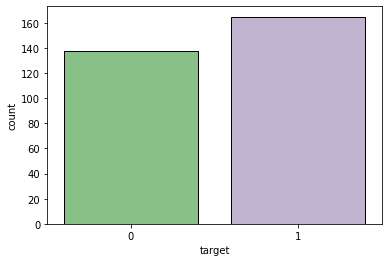

In [17]:
sns.countplot(data = data , x = "target", palette = "Accent" , edgecolor = "black")

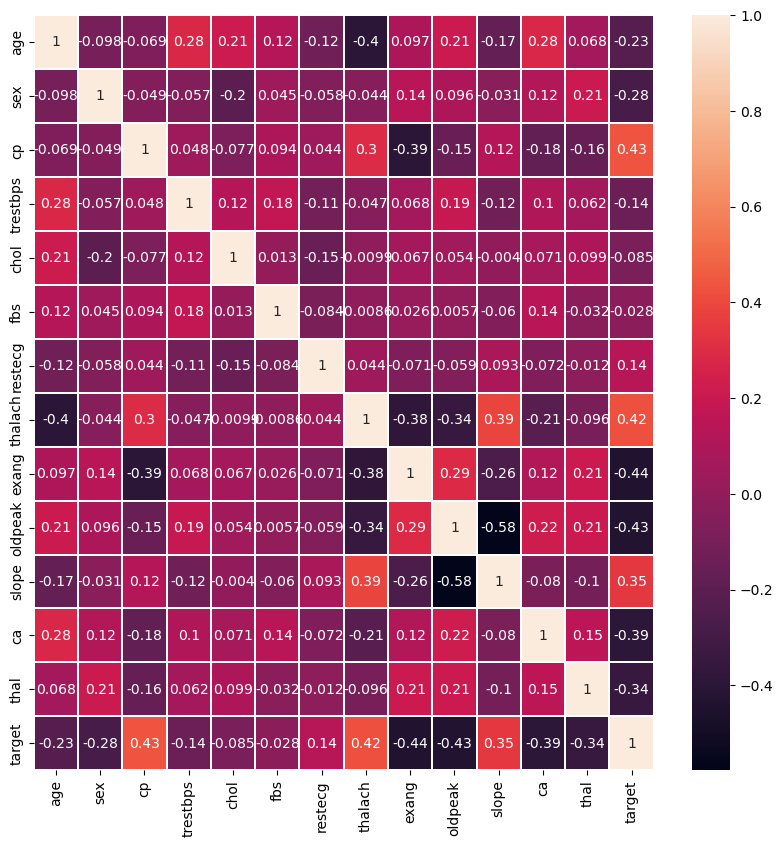

In [23]:
plt.figure(figsize = (10,10) , dpi = 100)

sns.heatmap(data.corr(), annot= True, linewidth = 0.2);

<AxesSubplot:xlabel='age', ylabel='chol'>

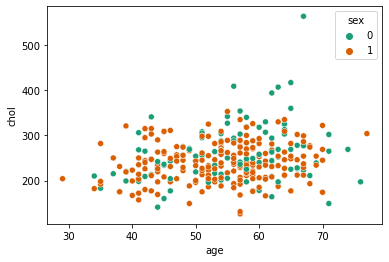

In [31]:
sns.scatterplot(data = data , x = "age" , y = "chol", hue = "sex" , palette = "Dark2")

<AxesSubplot:xlabel='age', ylabel='chol'>

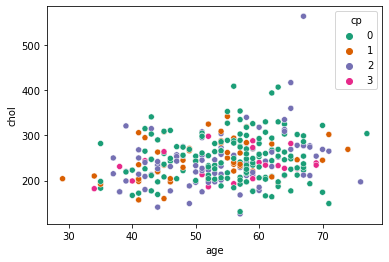

In [30]:
sns.scatterplot(data = data , x = "age" , y = "chol", hue = "cp" , palette = "Dark2")

<AxesSubplot:xlabel='cp', ylabel='count'>

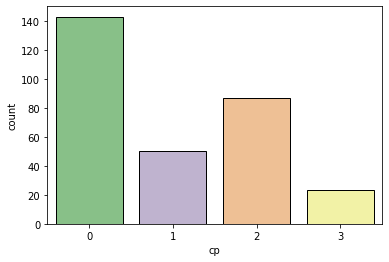

In [34]:
sns.countplot(data = data , x = "cp", palette = "Accent", edgecolor = "black")

<AxesSubplot:xlabel='age', ylabel='trestbps'>

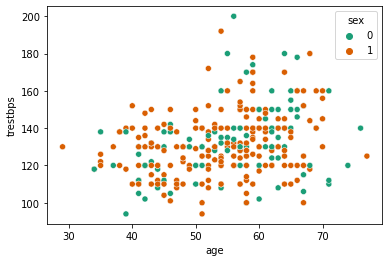

In [35]:
sns.scatterplot(data = data , x = "age" , y = "trestbps", hue = "sex" , palette = "Dark2")

<AxesSubplot:xlabel='target', ylabel='age'>

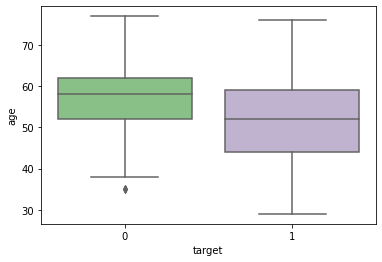

In [40]:
sns.boxplot(data = data , x = "target" , y = "age", palette = "Accent")

<AxesSubplot:xlabel='sex', ylabel='trestbps'>

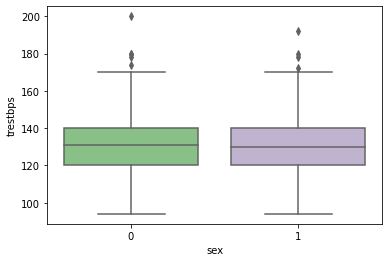

In [42]:
sns.boxplot(data = data , x = "sex" , y = "trestbps", palette = "Accent")

In [46]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

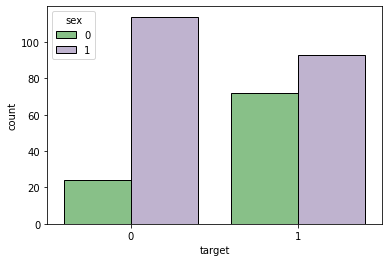

In [48]:
sns.countplot(data = data , x = "target" , hue = "sex" , palette = "Accent", edgecolor = "black")

<AxesSubplot:xlabel='sex', ylabel='count'>

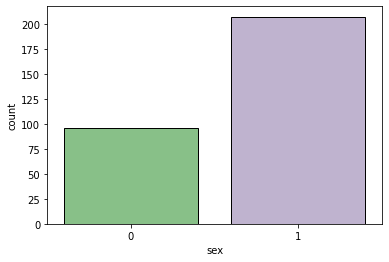

In [52]:
sns.countplot(data = data , x = "sex", palette = "Accent" , edgecolor = "black")

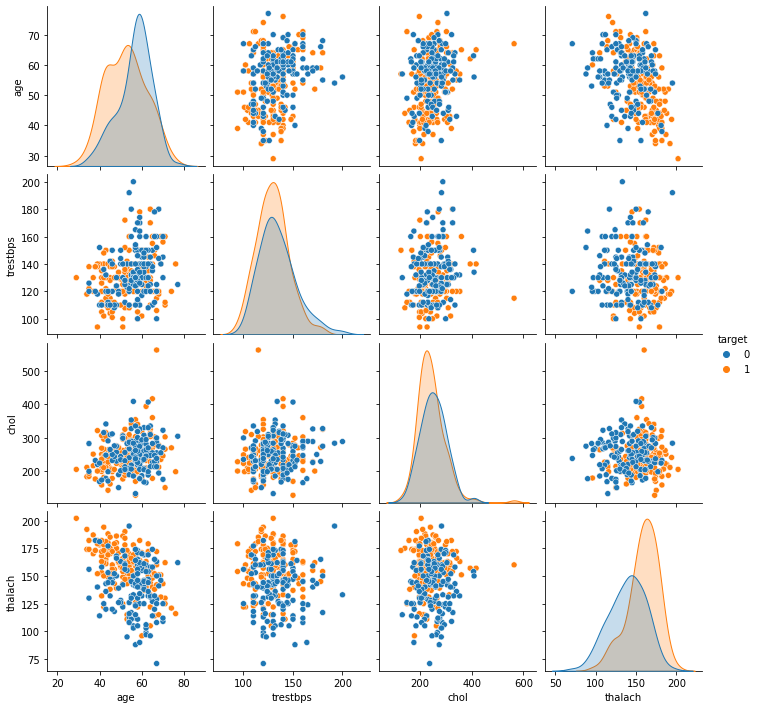

In [57]:
sns.pairplot(data[['age','trestbps', 'chol','thalach','target']] , hue = "target" )


# Machine Learning

## Train | Test Split and Scaling


In [58]:
X = data.drop("target" , axis = 1)

y = data["target"]

In [59]:
from sklearn.model_selection import train_test_split

In [19]:
train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scalar = StandardScaler()

In [63]:
scaled_X_train = scalar.fit_transform(X_train)

scaled_X_test = scalar.transform(X_test)

## Logistic Regression Model

In [69]:
from sklearn.linear_model import LogisticRegressionCV

In [73]:
log_model = LogisticRegressionCV()

In [74]:
log_model.fit(scaled_X_train , y_train)

LogisticRegressionCV()

In [75]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [76]:
log_model.C_

array([0.04641589])

### Coeffecients¶
TASK: Report back the model's coefficients.

In [77]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [80]:
coefs = pd.Series(index = X.columns , data = log_model.coef_[0])

In [82]:
coefs

age        -0.096212
sex        -0.394602
cp          0.535347
trestbps   -0.138502
chol       -0.088305
fbs         0.024873
restecg     0.080838
thalach     0.299141
exang      -0.334382
oldpeak    -0.352386
slope       0.251010
ca         -0.497358
thal       -0.374486
dtype: float64

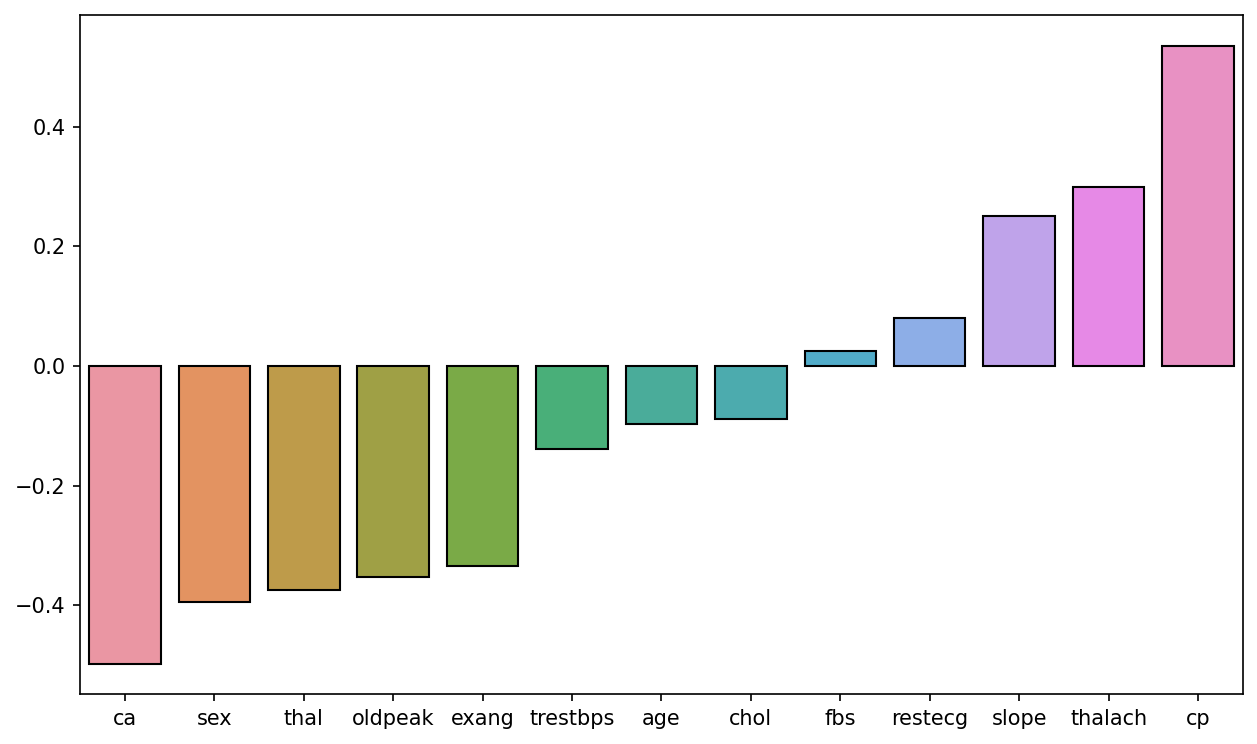

In [94]:
coefs = coefs.sort_values()

plt.figure(figsize = (10,6) , dpi = 150)

sns.barplot(x = coefs.index , y =coefs.values, edgecolor = "black");

---------

## Model Performance Evaluation

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [97]:
y_pred = log_model.predict(scaled_X_test)

In [98]:
accuracy_score(y_test , y_pred)

0.8387096774193549

In [99]:
confusion_matrix(y_test , y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


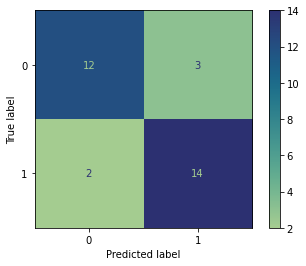

In [101]:
plot_confusion_matrix(log_model , scaled_X_test , y_test, cmap = "crest")

In [102]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [103]:
from sklearn.metrics import plot_roc_curve

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


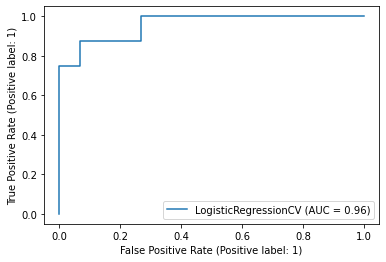

In [104]:
plot_roc_curve(log_model , scaled_X_test , y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [105]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [106]:
log_model.predict(patient)

array([0], dtype=int64)

In [107]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])